<a href="https://colab.research.google.com/github/ArezooAalipanah/machine_learning3/blob/main/HML3_Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 4 👼 Training Models
This chapter is mostly the mathematics and the idea behind the models that are used for training:)




In [1]:
# part 1: Linear Regression
import numpy as np

np.random.seed(42)
m = 100 # number of instances in the dataset

X = 2*np.random.rand(m,1) #column vector
y = 4+3* X +np.random.randn(m,1) #column vector #the randn part is to add noise
"""
rand() uses the uniform distribution on [0, 1] , while randn() 
uses the normal distribution with mean 0 and standard deviation 1.
"""


print("X: ", X)

print("y: ", y)

X:  [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]
 [1.22370579]
 [0.27898772]
 [0.5842893 ]
 [0.73272369]
 [0.91213997]
 [1.57035192]
 [0.39934756]
 [1.02846888]
 [1.18482914]
 [0.09290083]
 [1.2150897 ]
 [0.34104825]
 [0.13010319]
 [1.89777107]
 [1.93126407]
 [1.6167947 ]
 [0.60922754]
 [0.19534423]
 [1.36846605]
 [0.88030499]
 [0.24407647]
 [0.99035382]
 [0.06877704]
 [1.8186408 ]
 [0.51755996]
 [1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]
 [1.93916926]
 [1.55026565]
 [1.87899788]
 [1.7896547 ]
 [1.19579996]
 [1.84374847]
 [0.176985  ]
 [0.39196572]
 [0.09045458]
 [0.65066066]
 [0.77735458]
 [0.54269806]
 [1.65747502]
 [0.71350665]
 [0.56186902]
 [1.08539217]
 [0.28184845]
 [1.60439396]
 [0.14910129]
 [1.97377387]
 [1.54448954]
 [

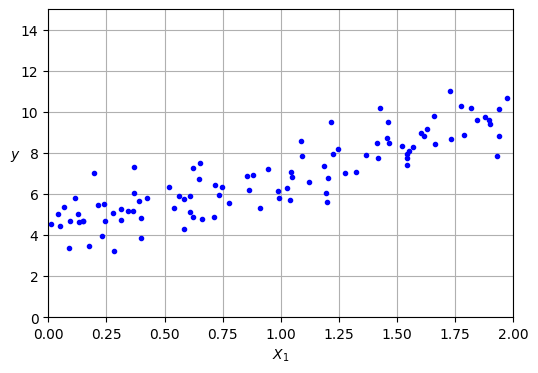

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize= (6,4))
#plt.scatter(X, y, c="blue")
plt.plot(X,y, "b.")
plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation = 0)
plt.axis([0, 2,0, 15])
plt.grid()

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) 
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
print(theta_best)

[[4.21509616]
 [2.77011339]]


In [5]:
# making the predictions:

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance

print(X_new_b)

[[1. 0.]
 [1. 2.]]


In [6]:
y_predict = X_new_b @theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

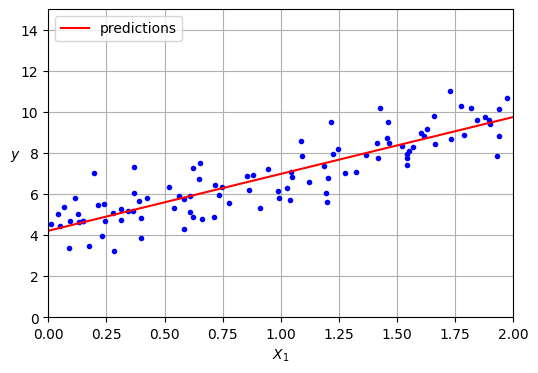

In [7]:
plt.figure(figsize= (6,4))
#plt.scatter(X, y, c="blue")
plt.plot(X,y, "b.")
plt.plot(X_new, y_predict, "r-", label="predictions")
plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation = 0)
plt.legend(loc="upper left")
plt.axis([0, 2,0, 15])
plt.grid()

In [8]:
# Now with scikit learn
from sklearn. linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
"""
Scikit-Learn separates the bias term (intercept_) from the feature
weights (coef_). The LinearRegression class is based on the scipy.linalg.lstsq()
function (the name stands for “least squares”)"""

'\nScikit-Learn separates the bias term (intercept_) from the feature\nweights (coef_). The LinearRegression class is based on the scipy.linalg.lstsq()\nfunction (the name stands for “least squares”)'

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [10]:
#directly calling the scipy linalg least squares:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [11]:
print(theta_best_svd)
print(s)
print(rank)
print(residuals)

[[4.21509616]
 [2.77011339]]
[14.37020392  4.11961067]
2
[80.6584564]


In [12]:
np.linalg.pinv(X_b)@y

array([[4.21509616],
       [2.77011339]])

In [13]:
# gradient decsent?
eta = 0.1 #learning rate
n_epochs = 1000
m = len(X_b) #number of instances 

np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized mode parameters

for epoch in range(n_epochs):
  gradients = 2/m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients
 # print(theta)


In [14]:
theta

array([[4.21509616],
       [2.77011339]])

[Text(0, 0.0, ''),
 Text(0, 2.0, ''),
 Text(0, 4.0, ''),
 Text(0, 6.0, ''),
 Text(0, 8.0, ''),
 Text(0, 10.0, ''),
 Text(0, 12.0, ''),
 Text(0, 14.0, ''),
 Text(0, 16.0, '')]

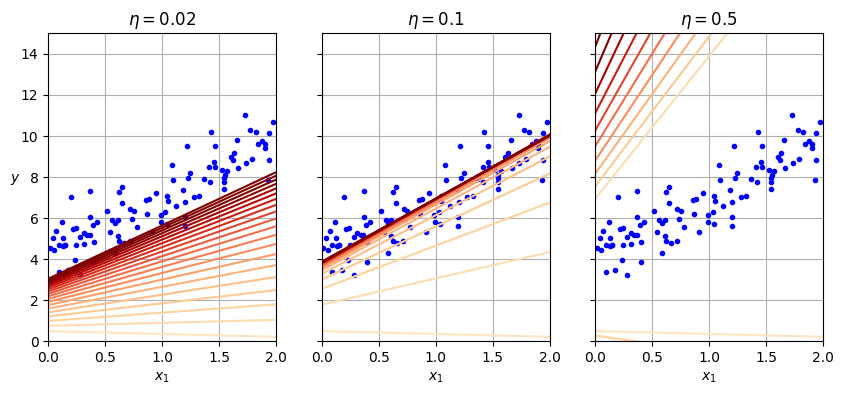

In [17]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
  m = len(X_b)
  plt.plot(X, y, "b.")
  n_epochs = 1000
  n_shown = 20 #showing the first 20 steps of gradient descent
  theta_path = []
  for epoch in range(n_epochs):
    if epoch < n_shown: 
      y_predict = X_new_b @ theta
      color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch/n_shown + 0.15)) 
      # this part is to produce a shade of colors for different lines
      plt.plot(X_new, y_predict, linestyle = "solid", color = color)
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    theta_path.append(theta)
  plt.xlabel("$x_1$")
  plt.axis([0,2,0,15])
  plt.grid()
  plt.title(fr"$\eta = {eta}$")
  return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

plt.figure(figsize = (10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation  = 0)
plt.subplot(132)
plot_gradient_descent(theta, eta = 0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plot_gradient_descent(theta, eta = 0.5)
plt.gca().axes.yaxis.set_ticklabels([])



In [18]:
# Stochastic G D
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0/(t + t1)

np.random.seed(42)
theta = np.random.randn(2,1) #random initialization

for epoch in range(n_epochs):
  for iteration in range(m): # m is the number of instances in the dataset
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD do not devide by m
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients


In [19]:
theta

array([[4.21076011],
       [2.74856079]])

In [20]:
m

100

In [21]:
xi

array([[1.        , 1.20223002]])

In [23]:
X_b[7 : 8]

array([[1.        , 1.73235229]])

In [24]:
X_b[8 : 9]

array([[1.        , 1.20223002]])

In [25]:
X_b[9]

array([1.        , 1.41614516])

In [26]:
X_b[8]

array([1.        , 1.20223002])

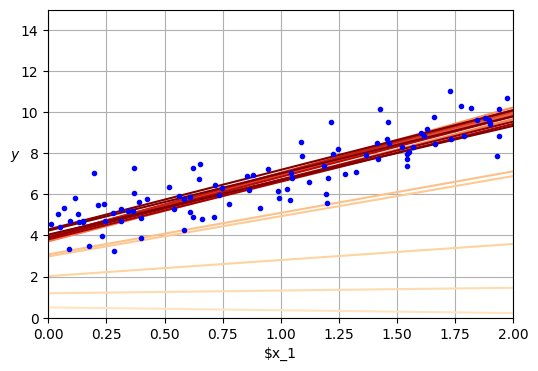

In [31]:
# Stochastic G D
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0/(t + t1)


np.random.seed(42)
theta = np.random.randn(2,1) #random initialization

n_shown = 20
plt.figure(figsize = (6, 4))

for epoch in range(n_epochs):
  for iteration in range(m): # m is the number of instances in the dataset

    if epoch == 0 and iteration < n_shown:
      y_predict = X_new_b @ theta
      color = mpl. colors. rgb2hex (plt.cm.OrRd(iteration / n_shown + 0.15))
      plt.plot(X_new, y_predict, color = color)
    
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD do not devide by m
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients

plt.plot(X,y, "b.")
plt.xlabel("$x_1")
plt.ylabel("$y$", rotation = 0)
plt.axis([0, 2, 0, 15])
plt.grid()

In [32]:
# now with sklearn
"""
following code runs for maximum 1,000 epochs (max_iter) or until the loss drops by
less than 10–5 (tol) during 100 epochs (n_iter_no_change).
It starts with a learning rate of 0.01 (eta0), using the
 default learning schedule (different from the one weused). 
Lastly, it does not use any regularization (penalty=None).
"""
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state = 42)

sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [34]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [36]:
#polynomial regression
np.random.seed(42)
m = 100 
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m, 1)

Text(0, 0.5, '$y$')

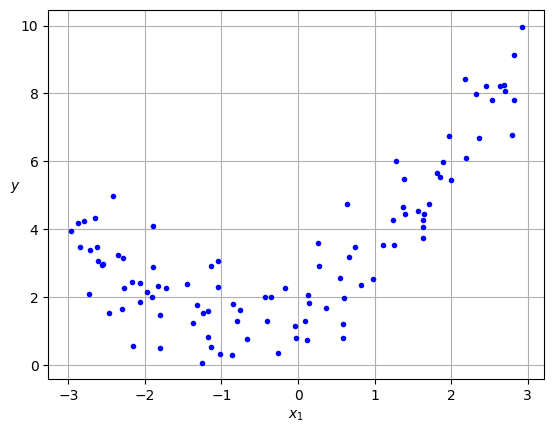

In [39]:
plt.plot(X, y, "b.")
plt.grid()
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)

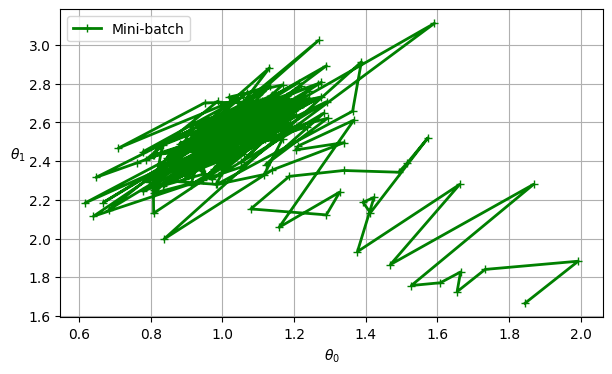

In [47]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_bgd = []
#plot_gradient_descent(theta, eta)
theta_path_sgd = [] 
theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
##plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
#         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
#plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
#         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
#plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

In [46]:
theta_path_mgd

array([[[1.84411806],
        [1.66542522]],

       [[1.99288588],
        [1.88290709]],

       [[1.73310567],
        [1.84053835]],

       [[1.65493566],
        [1.72562349]],

       [[1.66457858],
        [1.82740374]],

       [[1.60817175],
        [1.77164484]],

       [[1.52712732],
        [1.75738575]],

       [[1.86854482],
        [2.2800482 ]],

       [[1.46880916],
        [1.86575396]],

       [[1.66218255],
        [2.27948455]],

       [[1.37662477],
        [1.93217438]],

       [[1.42294016],
        [2.21211367]],

       [[1.39228893],
        [2.18717352]],

       [[1.41275529],
        [2.13311579]],

       [[1.57372411],
        [2.52041178]],

       [[1.51543292],
        [2.3892646 ]],

       [[1.49158817],
        [2.34237945]],

       [[1.33826087],
        [2.35128257]],

       [[1.18656872],
        [2.32116085]],

       [[1.07884243],
        [2.1528049 ]],

       [[1.28995887],
        [2.12213873]],

       [[1.32722084],
        [2.2

Text(0, 0.5, '$y$')

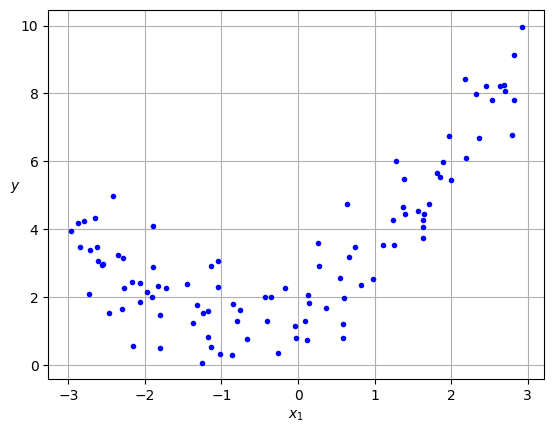

In [48]:
plt.plot(X, y, "b.")
plt.grid()
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)

In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)


In [50]:
X[0]

array([-0.75275929])

In [51]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [67]:
#X_poly now contains the original feature of X plus the square of this feature
#can fit a LinearRegression model to this extended training data
line_reg = LinearRegression()
lin_reg.fit(X_poly, y)


LinearRegression()

In [68]:
lin_reg.intercept_ , lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

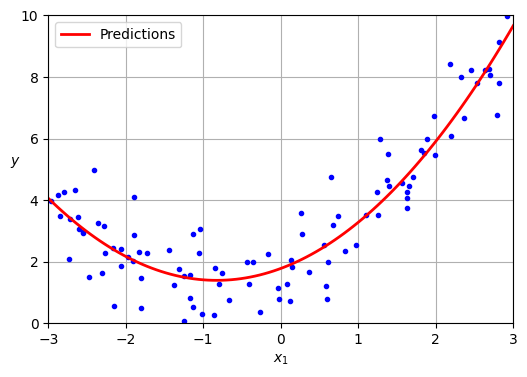

In [69]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()

plt.show()

In [56]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
low_poly_features = PolynomialFeatures(degree = 1, include_bias = False)


In [58]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)



LinearRegression()

In [70]:
high_poly_features = PolynomialFeatures(degree = 300, include_bias = False)
X_poly_high = high_poly_features.fit_transform(X)


lin_reg_l = LinearRegression()
lin_reg_l.fit(X_poly_high, y)


LinearRegression()

In [64]:
lin_reg_l.coef_ , lin_reg_l.intercept_

(array([[ 7.96029961e-128,  7.40420846e-131, -3.03003603e-133,
          8.46110915e-134,  7.12034478e-133, -6.13230697e-133,
         -6.09424557e-132, -4.04055724e-133,  4.45206227e-135,
          2.17982212e-136,  1.26766623e-132,  4.04016592e-133,
          1.22168811e-134,  3.12120225e-135,  6.80303867e-135,
          6.31601177e-137,  1.12416685e-135, -1.69532106e-135,
          3.96703417e-134, -1.88644776e-135,  2.43860658e-134,
         -9.90250249e-136,  1.20093055e-134, -1.42991551e-135,
          2.84723132e-135, -1.00951946e-135,  1.23041543e-135,
         -2.20220633e-135,  2.73125054e-135,  8.43343684e-134,
          2.80945112e-135, -1.96206862e-135, -1.13229837e-134,
         -1.47844035e-134,  1.95415611e-135, -2.24765972e-135,
          2.04569451e-135, -1.73858569e-135,  1.22133637e-135,
          4.33556380e-136, -1.25809242e-135,  4.08421071e-135,
         -6.34061426e-135, -3.03570733e-135,  3.04194109e-135,
         -4.11394558e-136,  3.46256325e-136, -1.4034689

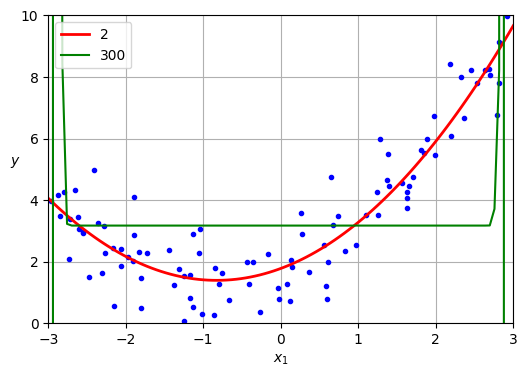

In [74]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
X_new_poly_high = high_poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
y_new_high = lin_reg_l.predict(X_new_poly_high)
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="2")
plt.plot(X_new, y_new_high, "g-", linewidth=1.5, label="300")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()

plt.show()

In [72]:
X_new_poly_high

array([[-3.00000000e+000,  9.00000000e+000, -2.70000000e+001, ...,
         1.52101643e+142, -4.56304930e+142,  1.36891479e+143],
       [-2.93939394e+000,  8.64003673e+000, -2.53964716e+001, ...,
         3.47394332e+139, -1.02112879e+140,  3.00149978e+140],
       [-2.87878788e+000,  8.28741965e+000, -2.38577232e+001, ...,
         6.99005016e+136, -2.01228717e+137,  5.79294791e+137],
       ...,
       [ 2.87878788e+000,  8.28741965e+000,  2.38577232e+001, ...,
         6.99005016e+136,  2.01228717e+137,  5.79294791e+137],
       [ 2.93939394e+000,  8.64003673e+000,  2.53964716e+001, ...,
         3.47394332e+139,  1.02112879e+140,  3.00149978e+140],
       [ 3.00000000e+000,  9.00000000e+000,  2.70000000e+001, ...,
         1.52101643e+142,  4.56304930e+142,  1.36891479e+143]])

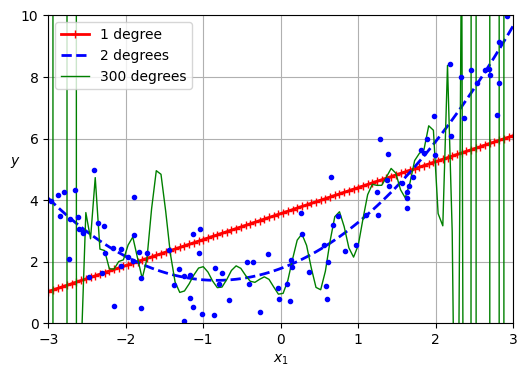

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()